In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
import io
from PIL import Image
from google.colab.patches import cv2_imshow
import time #delay
import imutils #resize

video_path = '/content/Traffic IP Camera video.mp4'
cam = cv2.VideoCapture(video_path)

Normal


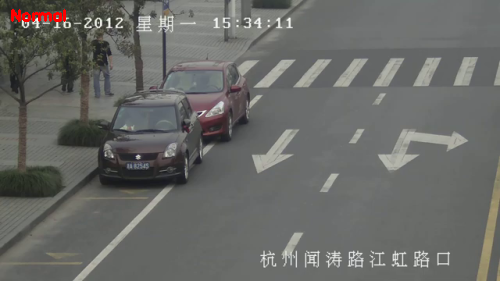

Normal


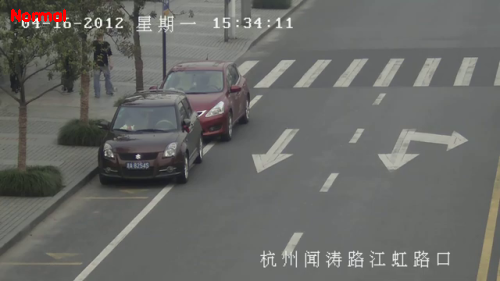

Normal


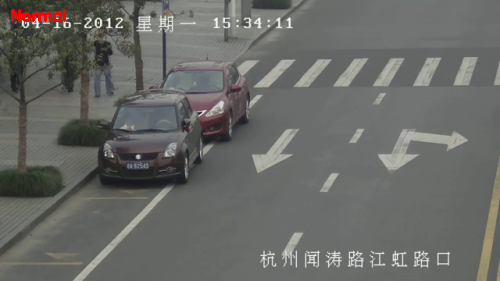

Normal


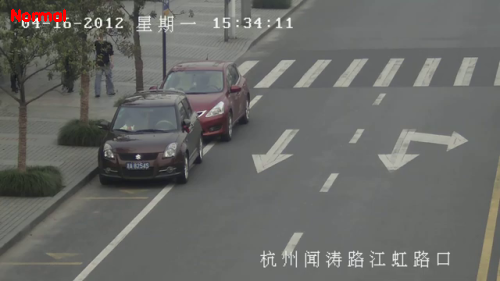

Normal


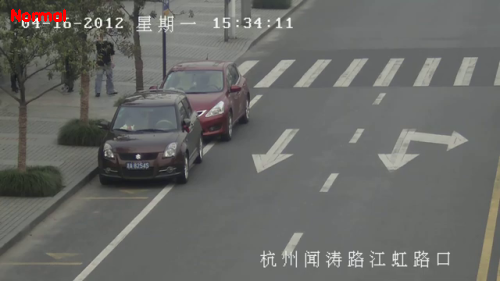

Normal


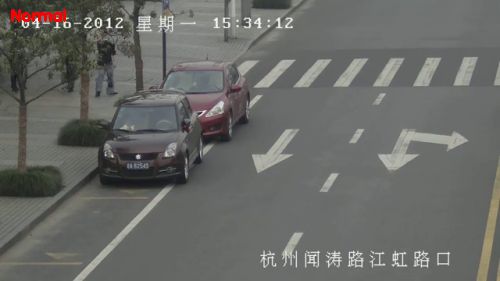

Normal


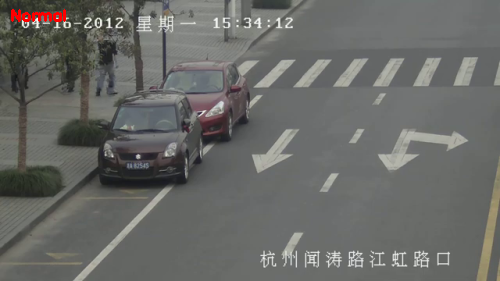

Normal


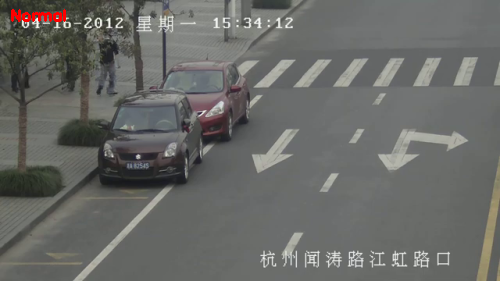

Normal


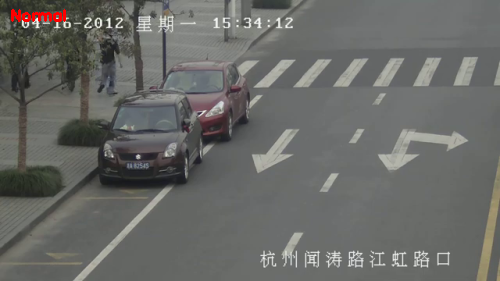

Moving Object detected


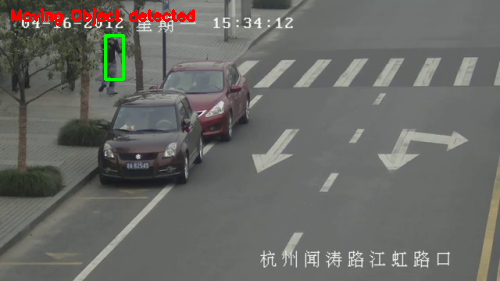

Moving Object detected


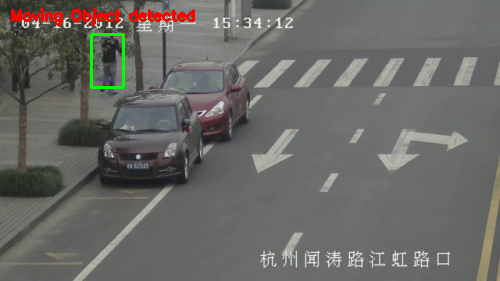

Moving Object detected


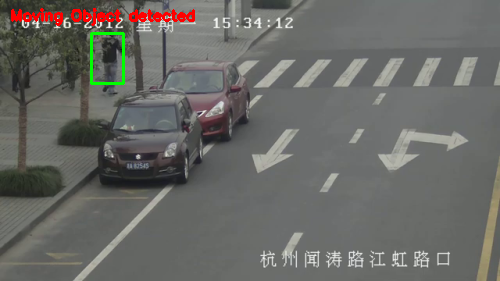

Moving Object detected


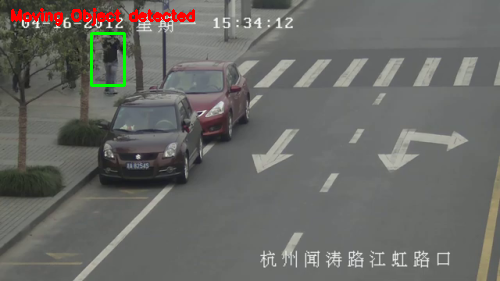

Moving Object detected


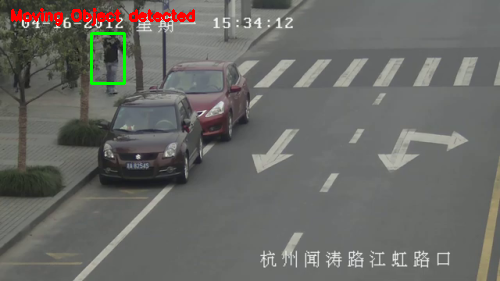

Moving Object detected


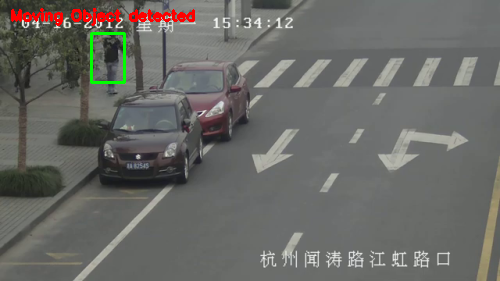

Moving Object detected


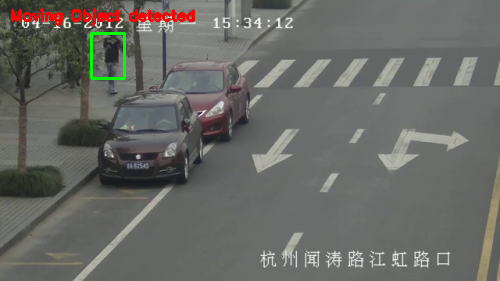

Moving Object detected


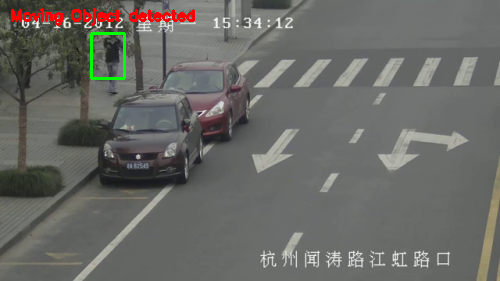

Moving Object detected


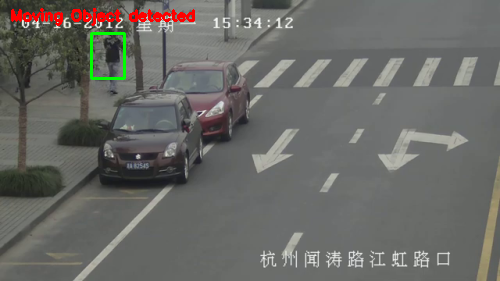

Moving Object detected


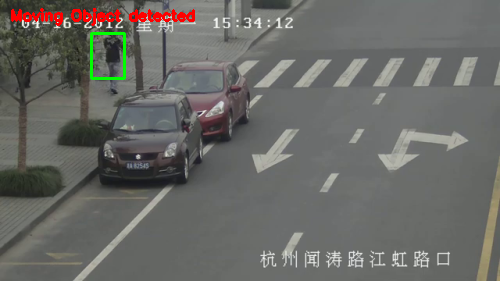

Moving Object detected


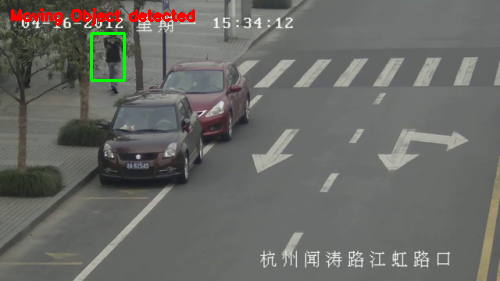

Moving Object detected


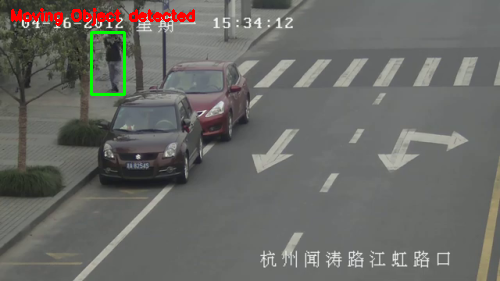

Moving Object detected


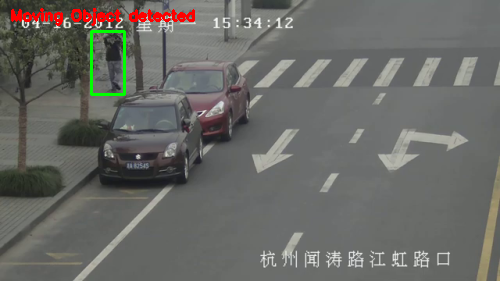

Moving Object detected


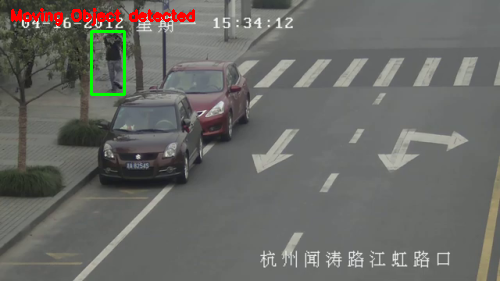

Moving Object detected


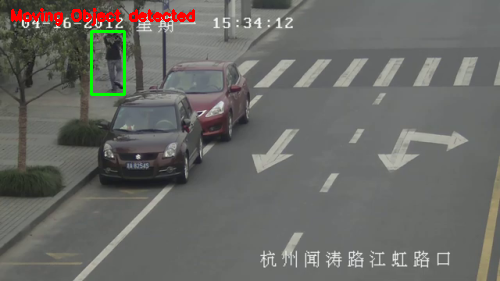

Moving Object detected


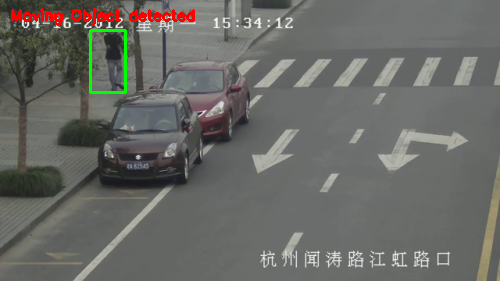

Moving Object detected


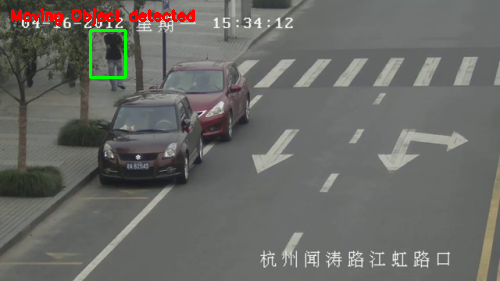

Moving Object detected


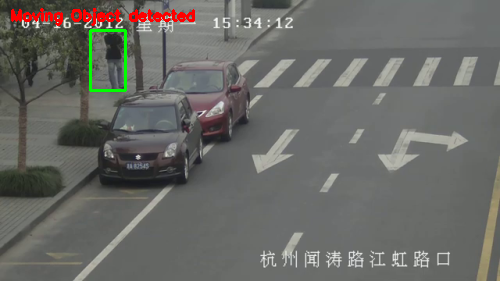

Moving Object detected


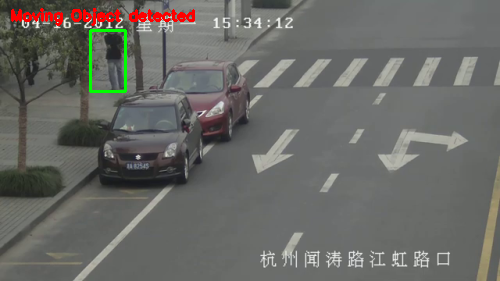

Moving Object detected


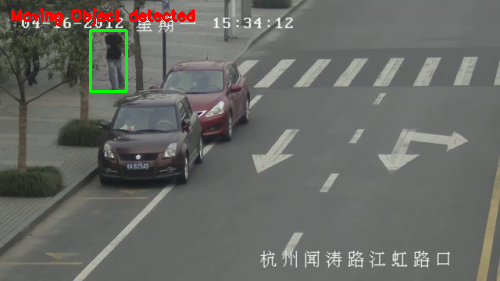

Moving Object detected


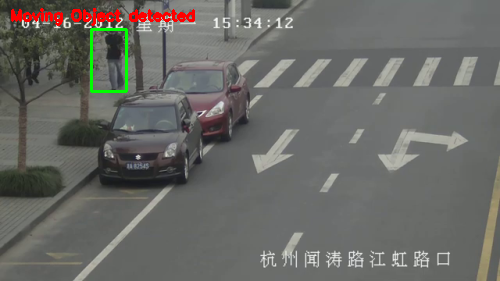

Moving Object detected


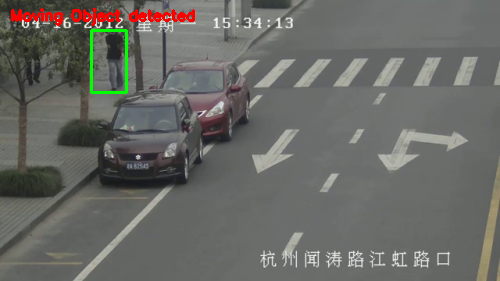

Moving Object detected


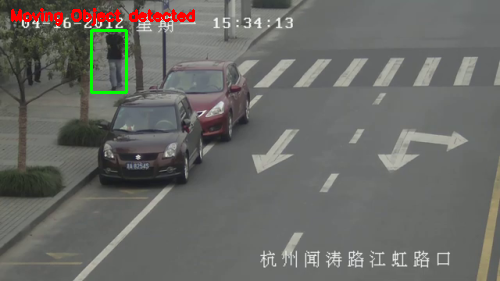

Moving Object detected


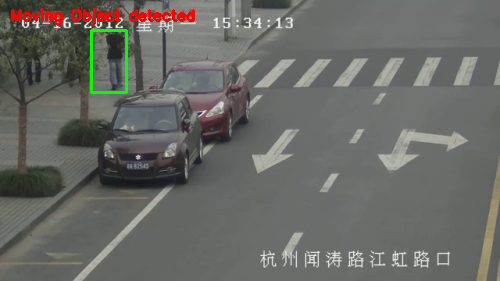

Moving Object detected


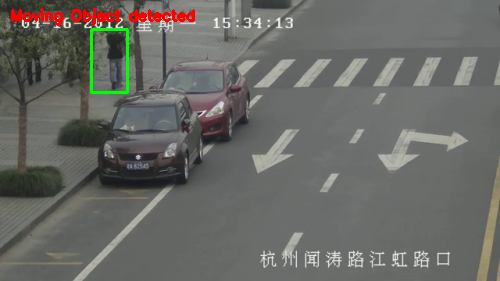

Moving Object detected


In [ ]:
time.sleep(1)
firstFrame=None
area = 500

while True:
    ret, img = cam.read() #read frame from camera
    # Check if frame is read correctly
    if not ret:
        print("Error: Failed to capture frame from camera")
        break  # Exit the loop if frame capture fails

    text = "Normal"
    img = imutils.resize(img, width=500) #resize

    grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #color 2 Gray scale image

    gaussianImg = cv2.GaussianBlur(grayImg, (21, 21), 0) #smoothened

    if firstFrame is None:
            firstFrame = gaussianImg #capturing 1st frame on 1st iteration
            continue

    imgDiff = cv2.absdiff(firstFrame, gaussianImg) #absolute diff b/w 1st nd current frame

    threshImg = cv2.threshold(imgDiff, 25, 255, cv2.THRESH_BINARY)[1] #binary

    threshImg = cv2.dilate(threshImg, None, iterations=2)

    cnts = cv2.findContours(threshImg.copy(), cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE)

    cnts = imutils.grab_contours(cnts)
    for c in cnts:
            if cv2.contourArea(c) < area:
                    continue
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            text = "Moving Object detected"
    print(text)
    cv2.putText(img, text, (10, 20),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    cv2_imshow(img)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        break

cam.release()
cv2.destroyAllWindows()